## Configuração do Sistema

In [132]:
import control
import control.matlab as matlab
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
# Motor DC Electro-Craft Modelo E-576 Servo Motor
b = 65*10**-6     # constante de atrito viscoso
Kt = 50*10**-3    # constante de torque
J = 60*10**-6     # inércia Total do rotor e da carga em relação ao eixo
Ke = 50*10**-3    # constante da força eletromotriz Kt = Ke
R = 3             # resistência do motor
L = 6*10**-3      # indutância do motor

# Matriz que multiplica o vetor de estados "x"
A = np.matrix([[0, 1, 0],    
              [0, -(b/J), (Kt/J)],
              [0, -(Ke/L), -(R/L)]])

# Vetor que multiplica o sinal "u"
B = np.matrix([[0],          
              [0],
              [(1/L)]])

# Vetor que multiplica as saídas "y"
C = np.array([0, 1, 0])

# Vetor que multiplica a perturbação "d"
PERTURBACAO = np.matrix([[0],         
              [-(1/J)],
              [0]])

# Espaço de estados SS
ss = matlab.ss(A, B, C, 0)

tf = control.ss2tf(ss)
tf

# Polos do Sistema:
polos = matlab.poles(tf)

# # Matriz de controlabilidade do sistema
# M = np.array([B, A * B, A**2 * B])

### Estipulando Valores de Overshoot e Tempo de Assentamento


In [133]:
import math

overshoot = 0.98        # overshoot do sistema
tempoDeAssentamento = 0.01 # tempo de assentamento do sistema

zeta = -np.log(overshoot)/math.sqrt(math.pi**2 + np.log(overshoot)**2)

poloDesejado_1 = -4 /tempoDeAssentamento + zeta * (4/tempoDeAssentamento*zeta) * math.sqrt(1-zeta**2)
poloDesejado_2 = -4 /tempoDeAssentamento - zeta * (4/tempoDeAssentamento*zeta) * math.sqrt(1-zeta**2)
poloDesejado_3 = 8*(-4/tempoDeAssentamento)

polosDesejados = np.array([poloDesejado_1, poloDesejado_2, poloDesejado_3])

# Matriz de ganho K
K = np.array(control.acker(A, B, polosDesejados))

## Resposta ao Degrau

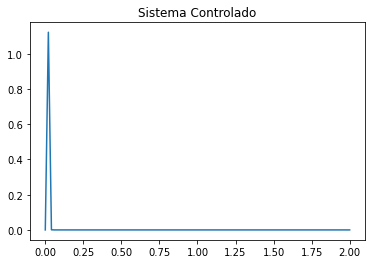

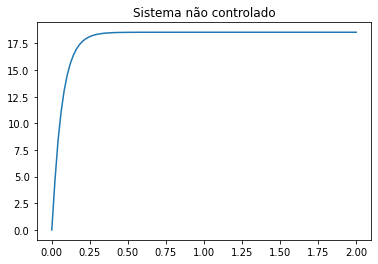

<LinearIOSystem:sys[204]:['u[0]']->['y[0]']>

In [134]:
AA = np.matrix(A - B*K)
BB = np.matrix((B*K[0][0]))
CC = C
DD = 0

ss_controlado = matlab.ss(AA, BB, CC, DD)
tf_controlado = control.ss2tf(ss_controlado)


t=np.linspace(0, 2, 100)

plt.figure(1)
plt.title('Sistema Controlado')
yout, T = matlab.step(ss_controlado, t)
plt.plot(T.T, yout.T)
plt.show()

plt.figure(1)
plt.title('Sistema não controlado')
yout, T = matlab.step(ss, t)
plt.plot(T.T, yout.T)
plt.show()

ss_controlado


### Diagrama de Body

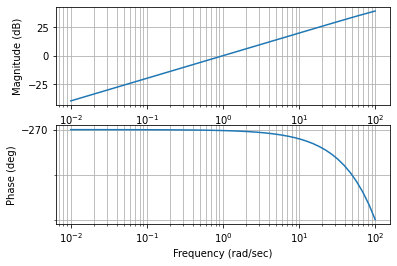

In [135]:
plt.figure(2)
mag, phase, om = matlab.bode(ss_controlado, matlab.logspace(-2, 2), plot=True)
plt.show()


### Local das Raízes

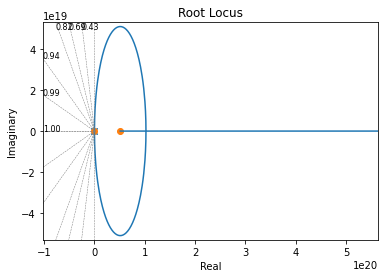

In [136]:
plt.figure(3)
matlab.rlocus(ss_controlado)
plt.show()
